<a href="https://colab.research.google.com/github/blaschis/blaschis/blob/main/Nvidia_stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Apresentação:**

#Este relatório apresenta uma análise detalhada dos preços de fechamento das ações da Nvidia, utilizando diversas técnicas de análise financeira e ciência de dados para extrair insights valiosos. As análises incluem a média móvel anual, retorno diário e acumulado, volatilidade e Bandas de Bollinger.
Datas do preço das ações: de 22 de janeiro de 1990 a 1 de setembro de 2024.



** Autoria: @pedroblaschi **  -  [linkedin](https://www.linkedin.com/in/pedro-blaschi-a3b5b22a9/)  -  [github](https://github.com/blaschis/blaschis) <p>

# libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings

warnings.filterwarnings('ignore')

# Lendo os dados e verificando estruturas

In [9]:
# Lendo os dados
df_dividendos = pd.read_csv('NvidiaStockDividend.csv')
df_preço = pd.read_csv('NvidiaStockPrice.csv')
df_divisão = pd.read_csv('NvidiaStockSplit.csv')

# Verificando os primeiros dados de cada DataFrame
df_dividendos.head()
df_preço.head()
df_divisão.head()

,Date,Stock Splits
0,2000-06-27,2:1
1,2001-09-12,2:1
2,2006-04-07,2:1
3,2007-09-11,3:2
4,2021-07-20,4:1


In [10]:
# Verificar a estrutura das bases de dados
print("Informações sobre df_dividendos:")
df_dividendos.info()

print("\nInformações sobre df_preço:")
df_preço.info()

print("\nInformações sobre df_divisão:")
df_divisão.info()

# Verificar os primeiros registos das bases de dados
print("\nPrimeiras linhas de df_dividendos:")
print(df_dividendos.head())

print("\nPrimeiras linhas de df_preço:")
print(df_preço.head())

print("\nPrimeiras linhas de df_divisão:")
print(df_divisão.head())

# Verificar estatísticas descritivas
print("\nEstatísticas descritivas de df_dividendos:")
print(df_dividendos.describe())

print("\nEstatísticas descritivas de df_preço:")
print(df_preço.describe())

print("\nEstatísticas descritivas de df_divisão:")
print(df_divisão.describe())

Informações sobre df_dividendos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       47 non-null     object 
 1   Dividends  47 non-null     float64
dtypes: float64(1), object(1)
memory usage: 880.0+ bytes

Informações sobre df_preço:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6444 non-null   object 
 1   Open       6444 non-null   float64
 2   High       6444 non-null   float64
 3   Low        6444 non-null   float64
 4   Close      6444 non-null   float64
 5   Adj Close  6444 non-null   float64
 6   Volume     6444 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 352.5+ KB

Informações sobre df_divisão:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entrie

# Análise do fechamento

In [18]:
# Convertendo coluna Dates
df_preço['Date'] = pd.to_datetime(df_preço['Date'])
df_preço.set_index('Date', inplace=True)

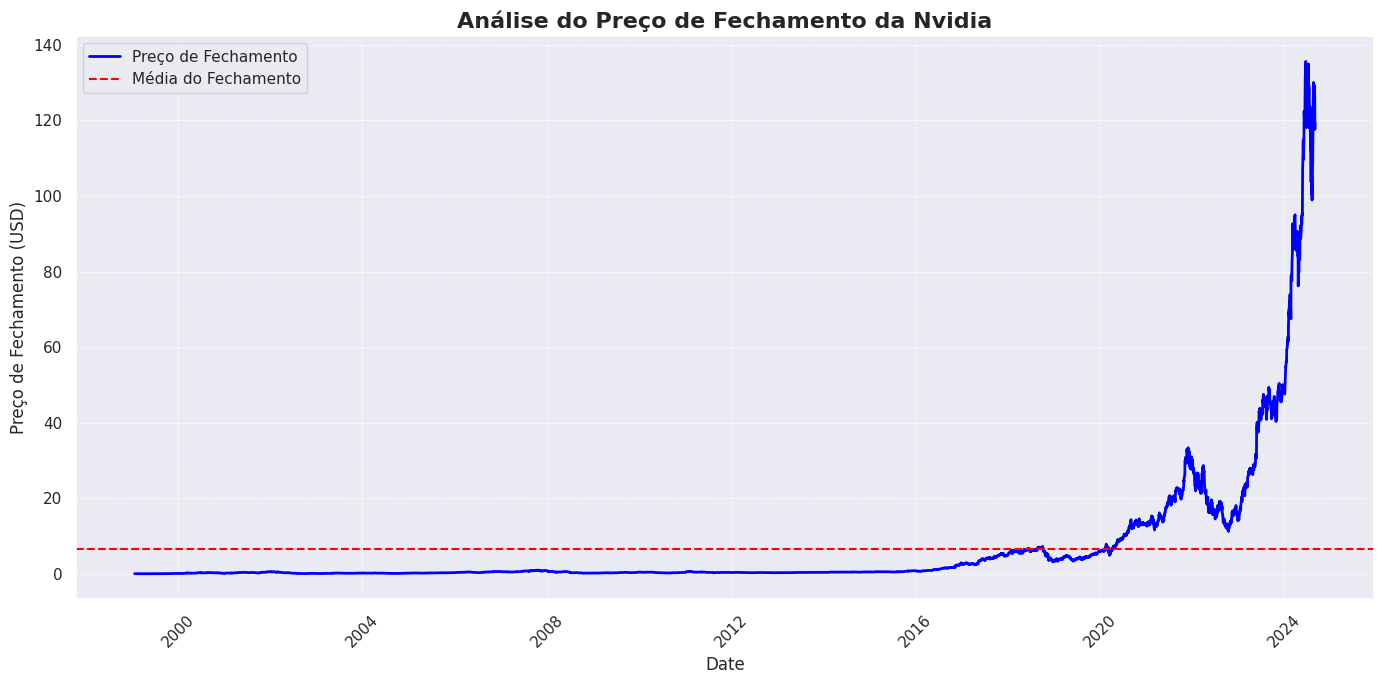

In [23]:
# Análise do fechamento
sns.set(style="darkgrid")
plt.figure(figsize=(14, 7))

# Plotar os dados do preço de fechamento
plt.plot(df_preço.index, df_preço['Close'], color='blue', linewidth=2, label='Preço de Fechamento')

# Adicionar título e rótulos aos eixos
plt.title('Análise do Preço de Fechamento da Nvidia', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Preço de Fechamento (USD)', fontsize=12)

plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.axhline(df_preço['Close'].mean(), color='red', linestyle='--', linewidth=1.5, label='Média do Fechamento')

plt.legend()
plt.tight_layout()
plt.show()

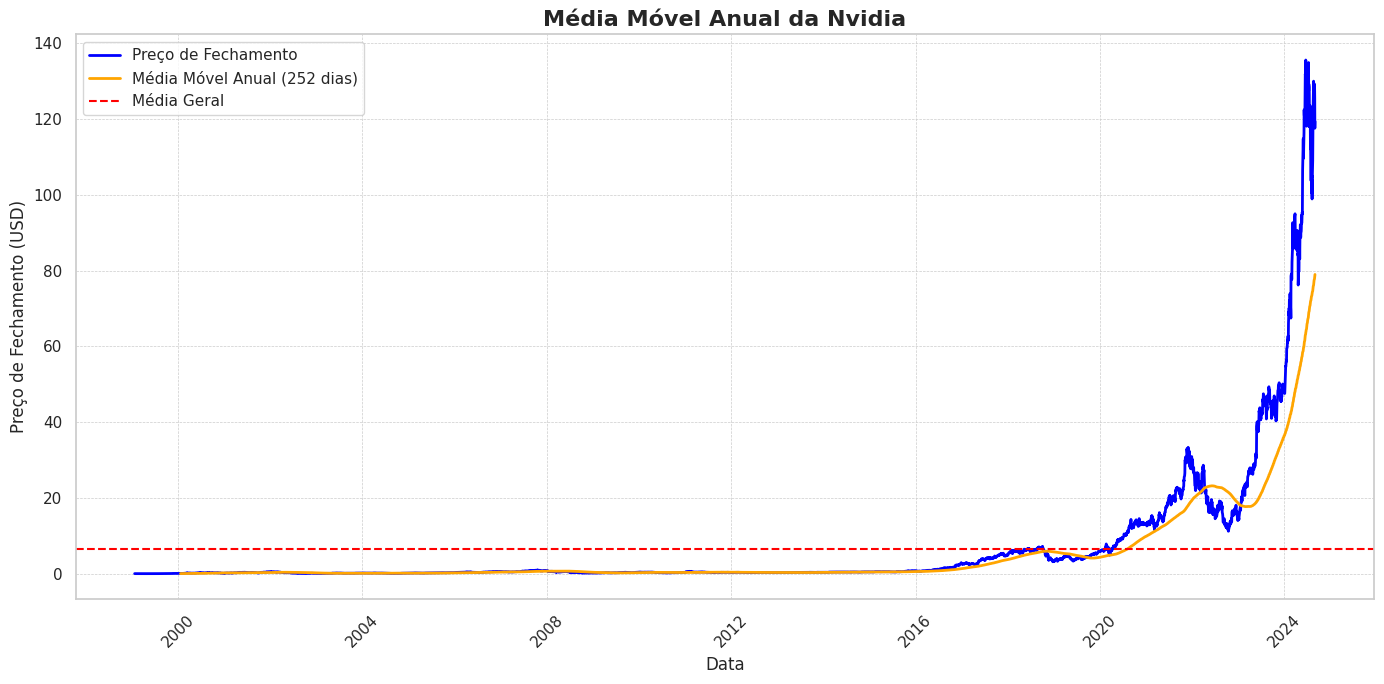

In [27]:
# Calcular a média móvel anual (252 dias úteis no mercado financeiro)
df_preço['Média Móvel Anual'] = df_preço['Close'].rolling(window=252).mean()

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Plotar os dados
plt.plot(df_preço.index, df_preço['Close'], color='blue', linewidth=2, label='Preço de Fechamento')
plt.plot(df_preço.index, df_preço['Média Móvel Anual'], color='orange', linewidth=2, label='Média Móvel Anual (252 dias)')

# Adicionar título e rótulos aos eixos
plt.title('Média Móvel Anual da Nvidia', fontsize=16, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço de Fechamento (USD)', fontsize=12)

plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(df_preço['Close'].mean(), color='red', linestyle='--', linewidth=1.5, label='Média Geral')
plt.legend()

plt.tight_layout()
plt.show()

#Retorno diário e acumulado das ações:
# A variação percentual diária dos preços de fechamento foi calculada para entender a performance diária do ativo. Observamos que os retornos diários apresentam variações significativas, refletindo a volatilidade do mercado.
# O retorno acumulado foi calculado para visualizar o crescimento do investimento ao longo do tempo. A análise mostrou que, apesar das flutuações diárias, o retorno acumulado tende a crescer, indicando uma valorização geral das ações da Nvidia.

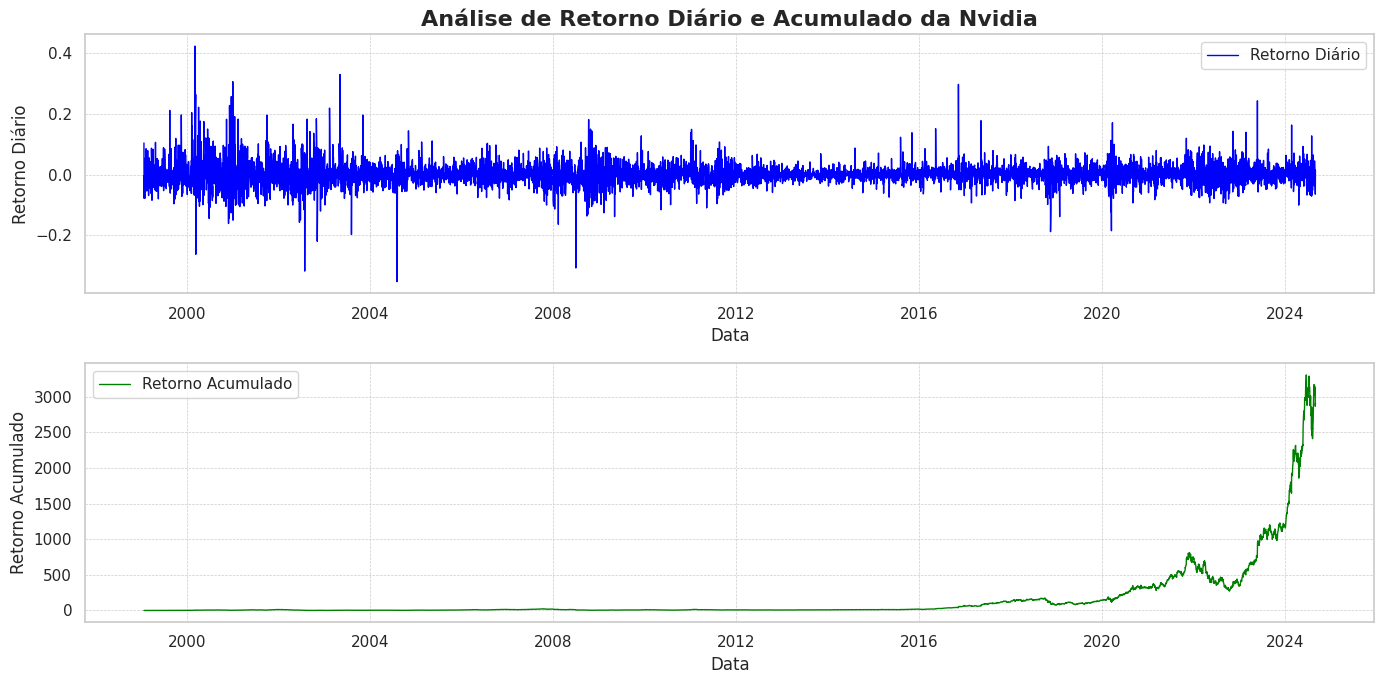

In [26]:
# Calcular o retorno
df_preço['Retorno Diário'] = df_preço['Close'].pct_change()
df_preço['Retorno Acumulado'] = (1 + df_preço['Retorno Diário']).cumprod() - 1

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Plotar o retorno diário
plt.subplot(2, 1, 1)
plt.plot(df_preço.index, df_preço['Retorno Diário'], color='blue', linewidth=1, label='Retorno Diário')
plt.title('Análise de Retorno Diário e Acumulado da Nvidia', fontsize=16, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Diário', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Plotar o retorno acumulado
plt.subplot(2, 1, 2)
plt.plot(df_preço.index, df_preço['Retorno Acumulado'], color='green', linewidth=1, label='Retorno Acumulado')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Acumulado', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# Análise de Volatilidade da Nvidia com Bandas de Bollinger:
# A análise de volatilidade revelou períodos de alta volatilidade, sugerindo que os investidores devem estar preparados para flutuações significativas nos preços.
# As Bandas de Bollinger foram calculadas com uma média móvel de 20 dias e duas vezes o desvio padrão. Observamos que os preços de fechamento frequentemente oscilam dentro das bandas, e movimentos fora das bandas podem indicar possíveis reversões de tendência.

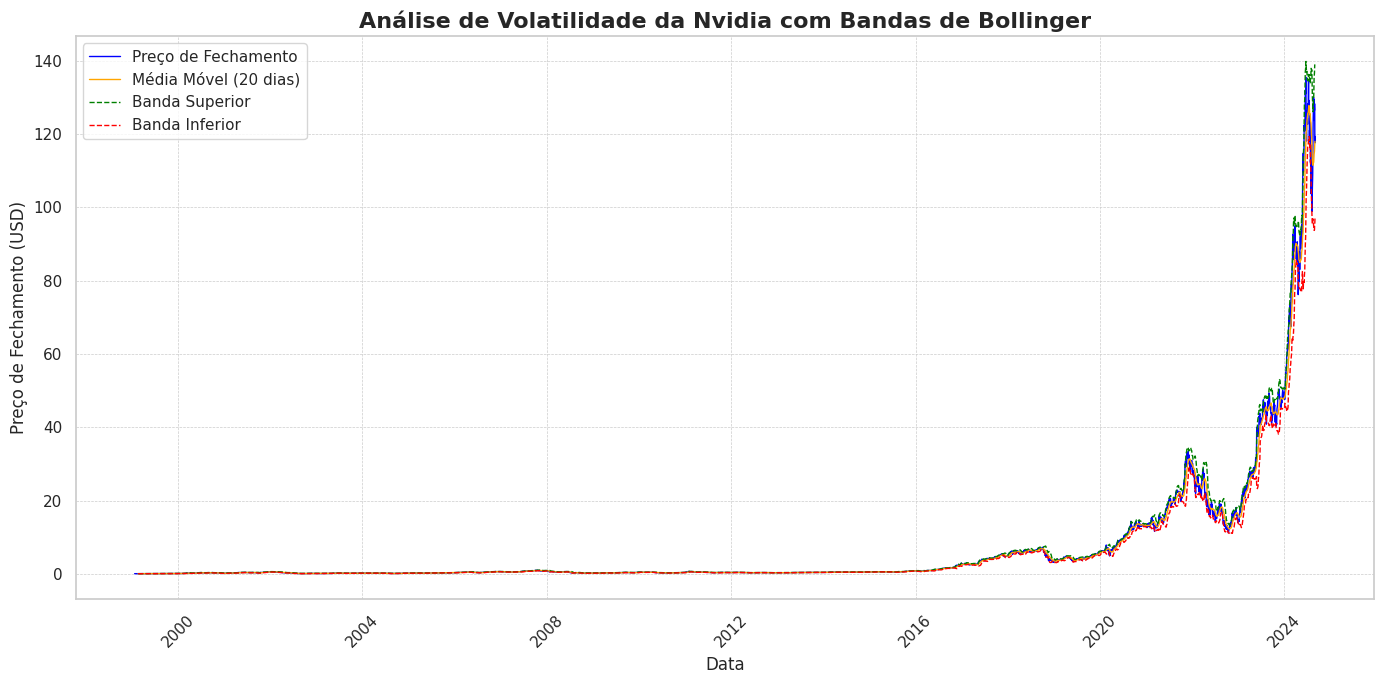

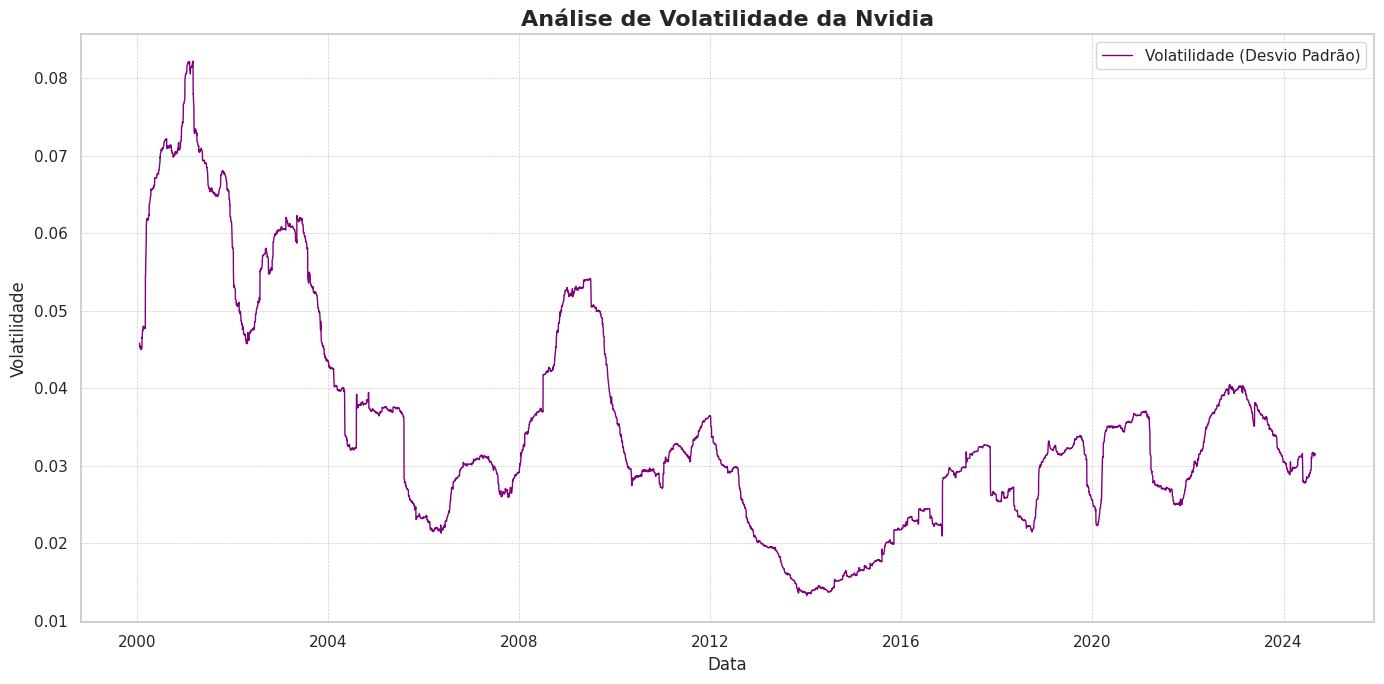

In [28]:
# Calcular o retorno diário
df_preço['Retorno Diário'] = df_preço['Close'].pct_change()

# Calcular a volatilidade (desvio padrão) dos retornos diários
df_preço['Volatilidade'] = df_preço['Retorno Diário'].rolling(window=252).std()

# Calcular as Bandas de Bollinger
df_preço['Média Móvel'] = df_preço['Close'].rolling(window=20).mean()
df_preço['Banda Superior'] = df_preço['Média Móvel'] + (df_preço['Close'].rolling(window=20).std() * 2)
df_preço['Banda Inferior'] = df_preço['Média Móvel'] - (df_preço['Close'].rolling(window=20).std() * 2)

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Plotar os dados do preço de fechamento
plt.plot(df_preço.index, df_preço['Close'], color='blue', linewidth=1, label='Preço de Fechamento')

# Plotar as Bandas de Bollinger
plt.plot(df_preço.index, df_preço['Média Móvel'], color='orange', linewidth=1, label='Média Móvel (20 dias)')
plt.plot(df_preço.index, df_preço['Banda Superior'], color='green', linestyle='--', linewidth=1, label='Banda Superior')
plt.plot(df_preço.index, df_preço['Banda Inferior'], color='red', linestyle='--', linewidth=1, label='Banda Inferior')

# Adicionar título e rótulos aos eixos
plt.title('Análise de Volatilidade da Nvidia com Bandas de Bollinger', fontsize=16, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço de Fechamento (USD)', fontsize=12)

plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Plotar a volatilidade
plt.figure(figsize=(14, 7))
plt.plot(df_preço.index, df_preço['Volatilidade'], color='purple', linewidth=1, label='Volatilidade (Desvio Padrão)')
plt.title('Análise de Volatilidade da Nvidia', fontsize=16, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Volatilidade', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [29]:
# Candlestick
grafico = go.Figure(
    data=[
        go.Candlestick(
            x=df_preço.index,
            open=df_preço['Open'],
            high=df_preço['High'],
            low=df_preço['Low'],
            close=df_preço['Close'],
            name='Candlestick'
        ),
        go.Scatter(
            x=df_preço.index,
            y=df_preço['Banda Superior'],
            line=dict(color='green', width=1, dash='dash'),
            name='Banda Superior'
        ),
        go.Scatter(
            x=df_preço.index,
            y=df_preço['Banda Inferior'],
            line=dict(color='red', width=1, dash='dash'),
            name='Banda Inferior'
        ),
        go.Scatter(
            x=df_preço.index,
            y=df_preço['Média Móvel'],
            line=dict(color='orange', width=1),
            name='Média Móvel (20 dias)'
        )
    ]
)

grafico.update_layout(
    title='Análise de Volatilidade da Nvidia com Candlestick e Bandas de Bollinger',
    xaxis_title='Data',
    yaxis_title='Preço de Fechamento (USD)',
    xaxis_rangeslider_visible=False
)

grafico.show()